In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to read real image files(png,jpg)
from matplotlib.image import imread

In [2]:
import os

In [3]:
pwd

'C:\\Users\\prajv\\Desktop\\PycharmProjects\\PS-PY\\venv\\TFLOW_ENV\\TF_2_Notebooks_and_Data\\04-CNNs'

In [4]:
#we use double forward slashes \\ to access path through python
os.listdir('C:\\Users\\prajv\\Desktop\\PycharmProjects\\PS-PY\\venv\\TFLOW_ENV\\TF_2_Notebooks_and_Data\\DATA\\cell_images\\cell_images\\')

['test', 'train']

In [3]:
data_path = 'C:\\Users\\prajv\\Desktop\\PycharmProjects\\PS-PY\\venv\\TFLOW_ENV\\TF_2_Notebooks_and_Data\\DATA\\cell_images\\cell_images\\'

In [6]:
data_path

'C:\\Users\\prajv\\Desktop\\PycharmProjects\\PS-PY\\venv\\TFLOW_ENV\\TF_2_Notebooks_and_Data\\DATA\\cell_images\\cell_images\\'

In [7]:
#lets check out the folder 
os.listdir(data_path+'train')

['parasitized', 'uninfected']

In [8]:
os.listdir(data_path+'train\\parasitized\\')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [9]:
#around 12,480 images in both parasitized and uninfected blood cells

In [10]:
len(os.listdir(data_path+'train\\parasitized\\'))

12480

In [11]:
len(os.listdir(data_path+'train\\uninfected\\'))

12480

In [12]:
os.listdir(data_path+'train\\parasitized\\')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
#lets see the first image

In [15]:
imread(data_path+'train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png')

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [16]:
#we can now see the image pixel matrix

In [4]:
cell1 = imread(data_path+'train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png')

In [5]:
cell1.shape

(148, 142, 3)

In [19]:
# the image is 3 color channel(rgb) and width=148, height=142

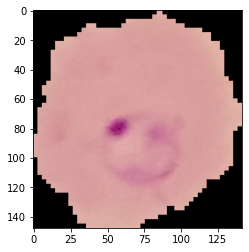

In [6]:
plt.imshow(cell1)

In [21]:
#the cell has infection which is seen as purple spots

In [22]:
# since the size of the images vary it will be difficult to train the model as we need images of the same size
#lets find the average size of the images

In [23]:
avg_width = []
avg_height = []
for cell in os.listdir(data_path+'train\\parasitized\\'):
    nimg = data_path+'train\\parasitized\\'+cell
    w1,h1,c1 = imread(nimg).shape
    avg_width.append(w1)
    avg_height.append(h1)

OSError: cannot identify image file 'C:\\Users\\prajv\\Desktop\\PycharmProjects\\PS-PY\\venv\\TFLOW_ENV\\TF_2_Notebooks_and_Data\\DATA\\cell_images\\cell_images\\train\\parasitized\\Thumbs.db'

In [24]:
len(avg_width)

12479

In [25]:
avg_height

[142,
 148,
 139,
 145,
 133,
 169,
 139,
 154,
 124,
 139,
 154,
 169,
 136,
 151,
 136,
 127,
 151,
 163,
 139,
 142,
 127,
 121,
 142,
 136,
 127,
 124,
 160,
 127,
 127,
 142,
 151,
 130,
 121,
 148,
 130,
 172,
 190,
 139,
 130,
 154,
 151,
 148,
 127,
 127,
 118,
 163,
 157,
 148,
 136,
 130,
 127,
 118,
 130,
 136,
 151,
 115,
 136,
 178,
 112,
 139,
 193,
 133,
 148,
 169,
 199,
 187,
 154,
 160,
 130,
 127,
 133,
 166,
 133,
 151,
 133,
 115,
 142,
 160,
 118,
 133,
 151,
 133,
 142,
 166,
 130,
 169,
 148,
 145,
 145,
 145,
 136,
 136,
 181,
 151,
 142,
 136,
 136,
 121,
 154,
 169,
 133,
 127,
 133,
 136,
 142,
 148,
 100,
 136,
 163,
 133,
 169,
 148,
 139,
 145,
 133,
 157,
 151,
 145,
 136,
 127,
 154,
 136,
 133,
 121,
 139,
 130,
 136,
 136,
 136,
 130,
 160,
 145,
 136,
 172,
 127,
 130,
 133,
 145,
 163,
 154,
 151,
 163,
 133,
 115,
 142,
 154,
 142,
 136,
 127,
 145,
 121,
 118,
 133,
 136,
 142,
 142,
 136,
 175,
 124,
 109,
 166,
 160,
 133,
 181,
 142,
 148,
 148

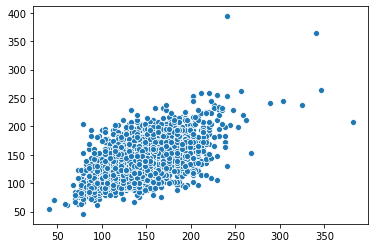

In [26]:
sns.scatterplot(avg_width,avg_height)

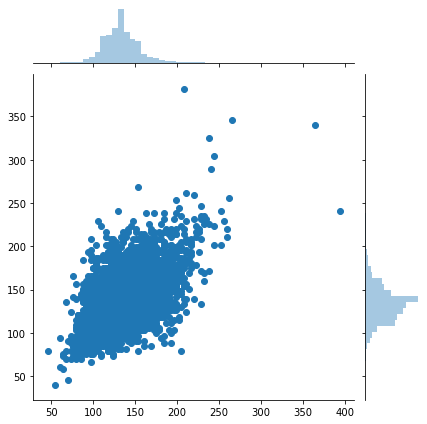

In [27]:
sns.jointplot(avg_height,avg_width)

In [28]:
np.mean(avg_width)

134.360205144643

In [29]:
np.mean(avg_height)

133.66447632021797

In [7]:
# we found the average width and height of the image

In [8]:
# since there is too much data for us to read in all at once into the memory we will use Image data generator from keras library
#We can use some built in functions in Keras to automatically process the data, 
# generate a flow of batches from a directory, and also manipulate the images.
#Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
#specify the parameters for the generator class
img_gen = ImageDataGenerator( rotation_range=20,#in degrees
    width_shift_range=0.1,#the images will have a max width shift of 10%
    height_shift_range=0.1,
    shear_range=0.1, # max of 10% of the image will be cut
    zoom_range=0.1, # zoom upto 10%
    fill_mode='nearest',# fill up the empty spaces with nearest pixel values
    rescale = 1/255,
    horizontal_flip=True) # flip the image horizontally

In [11]:
# by performing these image manipulations we will get a wide range of varying images to train the model

In [12]:
cell1

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

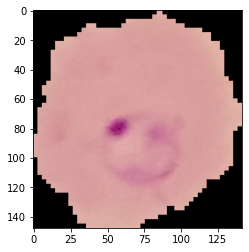

In [13]:
plt.imshow(cell1)

In [14]:
#after random transform
img_gen.random_transform(cell1)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

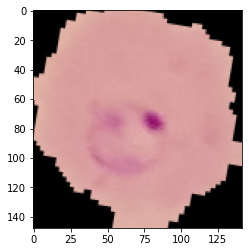

In [15]:
plt.imshow(img_gen.random_transform(cell1))

In [16]:
#we can now notice the image has been flipped and stretched and the missing data is filled with nearest pixel value

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [18]:
img_gen.flow_from_directory(data_path)

Found 27558 images belonging to 2 classes.


In [19]:
train_path = data_path+'train\\'
test_path = data_path+'test\\'

In [21]:
train_img_gen = img_gen.flow_from_directory(train_path)
train_img_gen
# here the 24958 images are the X_train data and 2 classes is the y_train

Found 24958 images belonging to 2 classes.


In [22]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [23]:
# the train folder has 2 sub folders parasitized and uninfected
# they are taken as the classes to predict while training automatically
# they are also labelled 'parasitized': 0, 'uninfected': 1

In [24]:
#since we use flow from directory we need not store the data in any variable ie no need for X_train,y_train etc.

In [25]:
# lets setup the train and test generators

In [26]:
cell1.shape

(148, 142, 3)

In [27]:
#set the target size to be the avg img size calculated ie 130,130,3

In [28]:
img_shape = (130,130,3)

In [41]:
train_img_gen = img_gen.flow_from_directory(train_path,target_size=img_shape[:2],#do not select the color channel
    color_mode='rgb',
    class_mode='binary',#set it to binary as it is a binary classification problem
    batch_size=16) # set it according to your system hardware ie 16 images at a time will be taken

Found 24958 images belonging to 2 classes.


In [42]:
test_img_gen = img_gen.flow_from_directory(test_path,target_size=img_shape[:2],#do not select the color channel
    color_mode='rgb',
    class_mode='binary',#set it to binary as it is a binary classification problem
    batch_size=16,shuffle=False)

Found 2600 images belonging to 2 classes.


In [31]:
# build the model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
model = Sequential()

In [44]:
#input layer is a convolution layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#add two more hidden layers,incerase the filters in powers of 2
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten the data
model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) #use a dropout layer to turn off half the neurons while training over the epochs

#o/p layer,choose activation='sigmoid' for binary classifiction problem
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [46]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
help(model.fit_generator)

Help on method fit_generator in module tensorflow.python.keras.engine.training:

fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, validation_freq=1, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Fits the model on data yielded batch-by-batch by a Python generator.
    
    The generator is run in parallel to the model, for efficiency.
    For instance, this allows you to do real-time data augmentation
    on images on CPU in parallel to training your model on GPU.
    
    The use of `keras.utils.Sequence` guarantees the ordering
    and guarantees the single use of every input per epoch when
    using `use_multiprocessing=True`.
    
    Arguments:
        generator: A generator or an instance of `Sequence`
          (`keras.utils.Sequence`)
            object in order to 

In [48]:
model.fit_generator(train_img_gen,validation_data=test_img_gen,epochs=15,callbacks=[early_stop])

Epoch 1/15
1560/1560 [==============================] - 633s 406ms/step - loss: 0.4190 - accuracy: 0.8348 - val_loss: 0.2987 - val_accuracy: 0.9165
Epoch 2/15
  22/1560 [..............................] - ETA: 10:03 - loss: 0.2923 - accuracy: 0.9176

KeyboardInterrupt: 

In [52]:
#training the model takes a lot of time as the images are very huge
#so best to import a trained model

In [55]:
model.history.history

{'loss': [0.4189768442610191],
 'accuracy': [0.8347624],
 'val_loss': [0.29869134380360235],
 'val_accuracy': [0.9165385]}

In [56]:
#lets just check the accuracy for the 1 epoch

In [59]:
df = pd.DataFrame(model.history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.418977,0.834762,0.298691,0.916538


In [60]:
df[['accuracy','val_accuracy']]

,accuracy,val_accuracy
0,0.834762,0.916538


In [62]:
#training the model takes a lot of time as the images are very huge
#so best to import a trained model

In [63]:
from tensorflow.keras.models import load_model

In [64]:
lmodel = load_model('malaria_detector.h5')

In [65]:
lmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [67]:
#cannot get history on a loaded model as i havent trained it on my pc
lmodel.history

AttributeError: 'Sequential' object has no attribute 'history'

In [68]:
predictions = lmodel.predict_generator(test_img_gen)

In [69]:
predictions

array([[6.7934394e-04],
       [1.7711520e-04],
       [5.4395199e-04],
       ...,
       [9.7619295e-01],
       [9.9099499e-01],
       [9.2485261e-01]], dtype=float32)

In [70]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [71]:
#the predictions make sense as the test_img_gen was not shuffled all the starting values are basically 0 and tthe ending ones
# are 1 which match the class indices and they way they are arranged in the directory

In [72]:
lmodel.evaluate_generator(test_img_gen)

[0.14402792777614726, 0.95076925]

In [75]:
lmodel.metrics_names

['loss', 'accuracy']

In [76]:
#so the model is 95% accurate

In [78]:
#lets say we wanted only the values of the classes which are greater than 50%(wkt base accuracy is 50% cause of binary classificaton)
#then we can operate on the predictions

In [79]:
repredictions = predictions > 0.5
repredictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [80]:
#numpy will treat it as true of false array

In [82]:
#evaluation

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(test_img_gen.classes,repredictions)) # take y_true as the test_img classes ie 0 or 1

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [85]:
print(confusion_matrix(test_img_gen.classes,repredictions))

[[1222   78]
 [  45 1255]]


In [86]:
#predict on new data

In [91]:
new_cell = test_path + '\\uninfected\\'

In [92]:
os.listdir(new_cell)

['C100P61ThinF_IMG_20150918_144104_cell_34.png',
 'C100P61ThinF_IMG_20150918_144348_cell_108.png',
 'C100P61ThinF_IMG_20150918_145042_cell_33.png',
 'C100P61ThinF_IMG_20150918_145422_cell_138.png',
 'C100P61ThinF_IMG_20150918_145938_cell_145.png',
 'C100P61ThinF_IMG_20150918_150041_cell_4.png',
 'C100P61ThinF_IMG_20150918_150041_cell_67.png',
 'C101P62ThinF_IMG_20150918_151149_cell_28.png',
 'C101P62ThinF_IMG_20150918_151149_cell_43.png',
 'C101P62ThinF_IMG_20150918_151335_cell_26.png',
 'C101P62ThinF_IMG_20150918_151942_cell_39.png',
 'C101P62ThinF_IMG_20150923_170344_cell_66.png',
 'C102P63ThinF_IMG_20150918_161826_cell_133.png',
 'C102P63ThinF_IMG_20150918_161826_cell_144.png',
 'C102P63ThinF_IMG_20150918_162155_cell_5.png',
 'C102P63ThinF_IMG_20150918_162155_cell_66.png',
 'C102P63ThinF_IMG_20150918_162511_cell_56.png',
 'C103P64ThinF_IMG_20150918_164331_cell_160.png',
 'C103P64ThinF_IMG_20150918_164331_cell_72.png',
 'C103P64ThinF_IMG_20150918_164553_cell_163.png',
 'C103P64ThinF_

In [93]:
len(new_cell)

130

In [95]:
#lets check the length of the test_img_gen
len(test_img_gen)

163

In [96]:
#there are 163 batches each of size 16 so..
163*16

2608

In [97]:
#which is almost similar to the number of images in the folder of the testset

In [100]:
os.listdir(new_cell)[0]

'C100P61ThinF_IMG_20150918_144104_cell_34.png'

In [103]:
#convert the image to a matrix first
imread(new_cell+os.listdir(new_cell)[0])

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

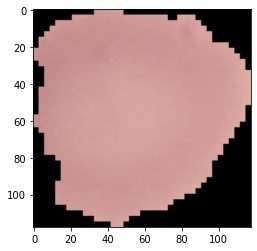

In [102]:
plt.imshow(imread(new_cell+os.listdir(new_cell)[0]))

In [104]:
imread(new_cell+os.listdir(new_cell)[0]).max()

0.8745098

In [105]:
#the image is already normalised so great

In [106]:
new_cell_arr = imread(new_cell+os.listdir(new_cell)[0])

In [107]:
new_cell_arr.shape

(118, 118, 3)

In [108]:
#have to reshape the image before predicting the class to (nos_images,width,height,color_channel)
#had defined it earlier in the model as (130,130,3)

In [110]:
model.predict_classes(new_cell_arr.reshape(130,130,3))

ValueError: cannot reshape array of size 41772 into shape (130,130,3)

In [111]:
#cannot reshape the image as the new image is smaller than the images trained in the model

In [112]:
#import an image class from the tensorflow librray to expand the image
from tensorflow.keras.preprocessing import image

In [120]:
new_cell_img = image.load_img(new_cell+os.listdir(new_cell)[0],target_size=img_shape)

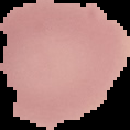

In [121]:
new_cell_img

In [122]:
type(new_cell_img)

PIL.Image.Image

In [123]:
new_cell_img.size

(130, 130)

In [124]:
new_cell_arr = image.img_to_array(new_cell_img)

In [125]:
new_cell_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [126]:
new_cell_arr.shape

(130, 130, 3)

In [127]:
#we can now expand the dimensions using numpy
# specify the index ie axis=0 for the dimension to be expanded
new_cell_arr = np.expand_dims(new_cell_arr,axis=0)

In [128]:
new_cell_arr.shape

(1, 130, 130, 3)

In [129]:
#the ususal method
new_cell_arr.reshape(1,130,130,3)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [130]:
lmodel.predict_classes(new_cell_arr.reshape(1,130,130,3))

array([[1]])

In [132]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [133]:
#the cell was uninfected so the model predicted correctly